In [31]:
#This section read the csv data into a DataFrame in pandas

import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import hvplot.pandas

path = 'DataScience_salaries_2024.csv'

salaries_df = pd.read_csv(path)

salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


# What job titles have the highest salaries? 

In [6]:
# We copy the salaries DataFrame into a new one that we can modify 
top_salaries_df = salaries_df.copy()
#Eliminate any duplicated data
top_salaries_df.drop_duplicates()
# Create a groupby df with the count of each job title 
titles_count_df = top_salaries_df.groupby('job_title').size().reset_index(name='count')
# Sort the values by highest count to lowest
titles_count_df = titles_count_df.sort_values(by='count', ascending=False)
# Export Result
titles_count_df.to_csv('csv_output/job_title_count.csv', index=False)


# Having this new df we can filter out all jobs that do not meet certain count criteria

titles_count_df_fil = titles_count_df[titles_count_df['count'] >= 20]

titles_count_df_fil.to_csv('csv_output/job_title_count_filtered.csv', index=False)




In [7]:
#considering the filtered job title count dataframe we can now categorize each job title 
data_engineering = [
    "Data Engineer", 
    "Data Architect", 
    "Data Developer", 
    "ETL Developer", 
    "Data Integration Engineer", 
    "Data Modeler", 
    "Data Product Manager", 
    "Data Developer", 
    "ETL Developer", 
    "Data Integration Engineer"
]
data_science = [
    "Data Scientist", 
    "Research Scientist", 
    "Applied Scientist", 
    "Data Science", 
    "Machine Learning Scientist", 
    "Data Science Manager", 
    "Research Analyst", 
    "Data Science Consultant", 
    "Data Science Lead", 
    "Director of Data Science", 
    "Machine Learning Researcher", 
    "AI Scientist", 
    "Data Science Engineer", 
    "Data Quality Analyst"
]
data_analysis = [
    "Data Analyst", 
    "Analytics Engineer", 
    "Business Intelligence Analyst", 
    "BI Analyst", 
    "Data Analytics Manager", 
    "Business Intelligence", 
    "Business Intelligence Developer", 
    "Business Intelligence Engineer", 
    "Business Data Analyst", 
    "Decision Scientist", 
    "Computer Vision Engineer", 
    "Data Operations Analyst", 
    "Data Integration Specialist", 
    "Data Analytics Specialist", 
    "Business Intelligence Manager", 
    "Data Reporting Analyst", 
    "CRM Data Analyst"
]
machine_learning = [
    "Machine Learning Engineer", 
    "ML Engineer", 
    "Machine Learning Scientist", 
    "AI Engineer", 
    "AI Architect", 
    "Machine Learning Infrastructure Engineer", 
    "MLOps Engineer", 
    "Machine Learning Researcher"
]

In [8]:
# we create a function that will categorize the job if the jobtitle name matches any of strings inside of any of the list listed before

def categorize_job_title(title):
    
    if title in data_engineering:
        title = 'data_engineering'
    elif title in data_science:
        title = 'data_science'
    elif title in data_analysis:
        title = 'data_analysis'
    elif title in machine_learning:
        title = 'machine_learning'
    else:
        title = 'Too specific title'
    return title

# Create a new row that categorize the job title into one of the big 4 data roles previusly defined

top_salaries_df['category'] = top_salaries_df['job_title'].apply(categorize_job_title)

top_salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,category
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L,data_science
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L,Too specific title
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,data_science
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S,machine_learning
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L,Too specific title
...,...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M,data_analysis
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M,Too specific title
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L,Too specific title
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L,data_analysis


In [9]:
# Now we calculate the Mean of the Salary in USD by category

mean_salary_cat = top_salaries_df.groupby('category')['salary_in_usd'].mean().reset_index()

# Eliminate the mean of salaries of jobtitles that are too specific and we keep the 4 main categories

mean_salary_cat = mean_salary_cat[mean_salary_cat['category'] != 'Too specific title']

mean_salary_cat

,category,salary_in_usd
1,data_analysis,118804.292544
2,data_engineering,147614.251289
3,data_science,161701.251666
4,machine_learning,187687.502643


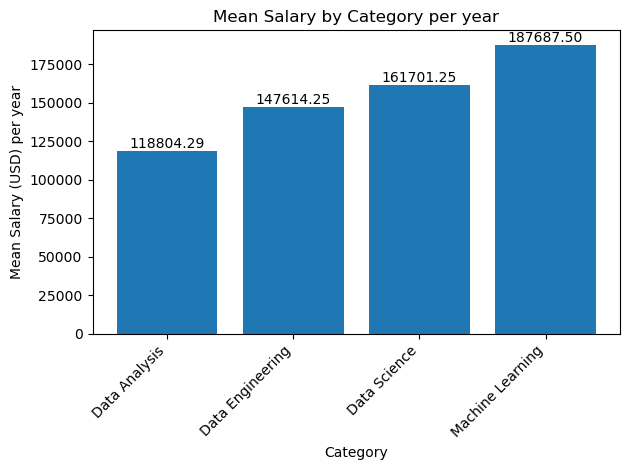

<Figure size 640x480 with 0 Axes>

In [17]:
# Graph the result 

bars = plt.bar(mean_salary_cat['category'],mean_salary_cat['salary_in_usd'])

plt.xlabel('Category')
plt.ylabel('Mean Salary (USD) per year')
plt.title('Mean Salary by Category per year')
custom_labels = ['Data Analysis','Data Engineering', 'Data Science', 'Machine Learning']
plt.xticks(mean_salary_cat['category'], custom_labels, rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.savefig('Figures/JavierFig1.png')

# Compare salaries between the United States and the rest of the countries in the dataset

In [19]:
# copy the DataFrame
country_salaries_df = salaries_df.copy()

country_count_df = country_salaries_df.groupby('company_location').size().reset_index(name='count')
# Sort the values by highest count to lowest
country_count_df = country_count_df.sort_values(by='count', ascending=False)
# Export Result
country_count_df.to_csv('csv_output/country_count.csv', index=False)

In [46]:
# defined the function that will contain the api query to get the Lat and lon information
def get_coordinates(country_code):
    
    url = f'https://nominatim.openstreetmap.org/search?q={country_code}&format=jsonv2'
    
    response = requests.get(url).json()
    
    Lat = float(response[0]['lat'])
    Lon = float(response[0]['lon'])
    return Lat, Lon


In [47]:
#store the lat and lon numbers to the country count dataframe
country_count_df[['Latitude', 'Longitude']] = country_count_df['company_location'].apply(lambda x: pd.Series(get_coordinates(x)))

country_count_df.to_csv('csv_output/country_count_coord.csv')
country_count_df

,company_location,count,Latitude,Longitude
74,US,12975,39.783730,-100.445882
27,GB,655,54.702354,-3.276575
11,CA,392,61.066692,-107.991707
24,ES,127,39.326068,-4.837979
18,DE,98,51.163818,10.447831
...,...,...,...,...
29,GI,1,36.128593,-5.347476
10,BS,1,24.773655,-78.000055
21,EC,1,-1.339767,-79.366697
20,DZ,1,28.000027,2.999983


In [67]:
map_plot_1 = country_count_df.hvplot.points(
    x="Longitude",
    y="Latitude",
    size = "count",
    hover_cols=['company_location', 'Count'],
    geo=True,
    tiles = "OSM",
    color = 'company_location',
    width = 800,
    height = 600,
    alpha = 0.5
)

#hvplot.save(map_plot_1, 'Figures/JavierFig2.png')
map_plot_1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (company_location,count)

In [69]:
us_salary_df = country_salaries_df[country_salaries_df['company_location'] == 'US']

not_us_salary_df = country_salaries_df[country_salaries_df['company_location'] != 'US']

not_us_salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
5,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L
